In [206]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
# The mass of the spacecraft is 600 kg

m_sc=600

# The moment of inertia of the spacecrfat including vscmg and wheel as point masses is 

Isx=100   # kg.m^2
Isy=100   # kg.m^2
Isz=100   # kg.m^2

Is=np.array([[Isx,0,0],[0,Isy,0],[0,0,Isz]])

# The moment of inertia of the gimbal taken in gimbal frame 

Ig1=0.036
Ig2=0.018
Ig3=0.006


# The moment of inertia of the wheel taken in wheel frame

Iq1=0.12
Iq2=0.03
Iq3=0.03

# The combined moment of inertia of gimbal and wheel taken in gimbal frame 

J1=0.156
J2=0.048
J3=0.036

J=np.array([[J1,0,0],[0,J2,0],[0,0,J3]])

In [208]:
# The initial angular velocity of spacecraft (components in body frame)

wx=0     #rad/s
wy=0     #rad/s
wz=0     #rad/s

# The intial mrps of the spacecraft 

sigma1 = 0.2
sigma2 = 0.3
sigma3 = 0.4

In [209]:
# The normal wheel speed is 150 rpm for each wheel 

Omega_1= (150*2*np.pi)/60    #rad/sec
Omega_2= Omega_1
Omega_3= Omega_1
Omega_4= Omega_1

# The initial gimbal angles are 

gamma_1=np.radians(45)        # vscmg1
gamma_2=np.radians(45)        # vscmg2
gamma_3=np.radians(45)        # vscmg3
gamma_4=np.radians(45)        # vscmg4

# The initial gimbal rates are 

gamma_dot_1=0                # vscmg1
gamma_dot_2=0                # vscmg2
gamma_dot_3=0                # vscmg3
gamma_dot_4=0                # vscmg4

# The mounting angle is 

theta=np.radians(54.75)


In [210]:
# Reference ( corresponding to gamma=0) 

# vscmg 1 

r_1=np.array([[0,1,0],[-np.sin(theta),0,-np.cos(theta)],[-np.cos(theta),0,np.sin(theta)]])

# vscmg 2 

r_2=np.array([[0,-np.sin(theta),-np.cos(theta)],[1,0,0], [0,-np.cos(theta),np.sin(theta)]])

# vscmg 3

r_3=np.array([[0,1,0],[-np.sin(theta),0,np.cos(theta)],[np.cos(theta),0,np.sin(theta)]])

# vscmg 4

r_4=np.array([[0, -np.sin(theta),np.cos(theta)],[1,0,0], [0, np.cos(theta),np.sin(theta)]])


In [211]:
# Direction cosine matrix that transforms from reference to current vscmg state 

def C(gamma):
    
    C=np.array([[np.cos(gamma),np.sin(gamma), 0],[-np.sin(gamma),np.cos(gamma),0],[0,0,1]])
    
    return C

In [212]:
# Initial orientation of vscmgs

# vscmg 1

g1_1=(C(gamma_1) @ r_1)[0,:].reshape(-1,1)
g2_1=(C(gamma_1) @ r_1)[1,:].reshape(-1,1)
g3_1=(C(gamma_1) @ r_1)[2,:].reshape(-1,1)


# vscmg 2

g1_2=(C(gamma_2) @ r_2)[0,:].reshape(-1,1)
g2_2=(C(gamma_2) @ r_2)[1,:].reshape(-1,1)
g3_2=(C(gamma_2) @ r_2)[2,:].reshape(-1,1)

# vscmg 3

g1_3=(C(gamma_3) @ r_3)[0,:].reshape(-1,1)
g2_3=(C(gamma_3) @ r_3)[1,:].reshape(-1,1)
g3_3=(C(gamma_3) @ r_3)[2,:].reshape(-1,1)

# vscmg 4

g1_4=(C(gamma_4) @ r_4)[0,:].reshape(-1,1)
g2_4=(C(gamma_4) @ r_4)[1,:].reshape(-1,1)
g3_4=(C(gamma_4) @ r_4)[2,:].reshape(-1,1)


In [213]:
# Initial angular velocity of spacecraft in gimbal frames

# vscmg1

w1_1=np.dot(np.array([wx,wy,wz]),g1_1.flatten())
w2_1=np.dot(np.array([wx,wy,wz]),g2_1.flatten())
w3_1=np.dot(np.array([wx,wy,wz]),g3_1.flatten())

# vscmg2

w1_2=np.dot(np.array([wx,wy,wz]),g1_2.flatten())
w2_2=np.dot(np.array([wx,wy,wz]),g2_2.flatten())
w3_2=np.dot(np.array([wx,wy,wz]),g3_2.flatten())

# vscmg3

w1_3=np.dot(np.array([wx,wy,wz]),g1_3.flatten())
w2_3=np.dot(np.array([wx,wy,wz]),g2_3.flatten())
w3_3=np.dot(np.array([wx,wy,wz]),g3_3.flatten())

# vscmg4

w1_4=np.dot(np.array([wx,wy,wz]),g1_4.flatten())
w2_4=np.dot(np.array([wx,wy,wz]),g2_4.flatten())
w3_4=np.dot(np.array([wx,wy,wz]),g3_4.flatten())



In [214]:
# J taken in body frame 

# vscmg 1

J_body_1=J1*(g1_1 @ g1_1.T)+J2*(g2_1 @ g2_1.T)+J3*(g3_1 @ g3_1.T)

# vscmg 2

J_body_2=J1*(g1_2 @ g1_2.T)+J2*(g2_2 @ g2_2.T)+J3*(g3_2 @ g3_2.T)

# vscmg 3

J_body_3=J1*(g1_3 @ g1_3.T)+J2*(g2_3 @ g2_3.T)+J3*(g3_3 @ g3_3.T)

# vscmg 4

J_body_4=J1*(g1_4 @ g1_4.T)+J2*(g2_4 @ g2_4.T)+J3*(g3_4 @ g3_4.T)


In [215]:
# Total inertia (at time t=0)

Ic=Is+J_body_1+J_body_2+J_body_3+J_body_4

In [216]:
# Left hand multilpler for runge-kutta integration

M=Ic-(Iq1*(g1_1 @ g1_1.T)+J3*(g3_1 @ g3_1.T)
      + Iq1*(g1_2 @ g1_2.T)+J3*(g3_2 @ g3_2.T)
      + Iq1*(g1_3 @ g1_3.T)+J3*(g3_3 @ g3_3.T)
      + Iq1*(g1_4 @ g1_4.T)+J3*(g3_4 @ g3_4.T))

In [217]:
# function to calculate modified rodrigues parameters from direction cosine matrix

def mrp_from_dcm(dcm):
    
    eta=np.sqrt(np.trace(dcm)+1)
    
    if eta == 0:
        
        eigvals, eigvecs = np.linalg.eig(dcm)
        rotation_axis = eigvecs[:, np.isclose(eigvals, 1)].flatten()
        sigma = np.array(rotation_axis / np.linalg.norm(rotation_axis))
        sigma1=sigma[0]
        sigma2=sigma[1]
        sigma3=sigma[2]
        
    else:
        
        multiplier=1/(eta*(eta+2))
        sigma1=multiplier*(dcm[1,2]-dcm[2,1])
        sigma2=multiplier*(dcm[2,0]-dcm[0,2])
        sigma3=multiplier*(dcm[0,1]-dcm[1,0])
        norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
        
        if norm > 1:
            sigma1=(-sigma1)/norm**2
            sigma2=(-sigma2)/norm**2
            sigma3=(-sigma3)/norm**2
    
    return np.array([sigma1,sigma2,sigma3])
    

In [218]:
# function to calculate direction cosine matrix from given modified rodrigues parameters

def dcm_from_mrp(sigma):
    
    sigma1=sigma[0]
    sigma2=sigma[1]
    sigma3=sigma[2]
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2
        
    sigma_squared=sigma1**2+sigma2**2+sigma3**2
    
    sigma_telda=np.array([
        [0,  -sigma3,  sigma2],
        [sigma3,  0,  -sigma1],
        [ -sigma2,  sigma1,  0]])
    
    sigma_telda_squared=sigma_telda @ sigma_telda
    
    DCM=np.eye(3)+(8* sigma_telda_squared-4*(1-sigma_squared)*sigma_telda)/((1+sigma_squared)**2)
    
    return (DCM)
    

In [219]:
# function to calculate 3-2-1, yaw-pitch-roll angles from given mrps

def angles(sigma):
    
    C=dcm_from_mrp(sigma)
    
    yaw = np.degrees(np.arctan2(C[0,1],C[0,0]))
    pitch = np.degrees(-np.arcsin(C[0,2]))
    roll= np.degrees(np.arctan2(C[1,2],C[2,2]))
    
    return (yaw,pitch,roll)

angles(np.array([0.2,0.3,0.4]))
   

(101.7422347777736, 7.319153882368184, 67.78281308860137)

In [220]:
# External torque acting on the spacecraft taken in body frame 

Lc=np.array([[0],[0],[0]])

In [221]:
# Constants 

mu=(10)**-9                           
lamda=200      

h_1=J1*((150*2*np.pi)/60)          
h_2=J1*((150*2*np.pi)/60)          
h_3=J1*((150*2*np.pi)/60)
h_4=J1*((150*2*np.pi)/60)

In [222]:
# calculating us and ug 

Q = np.hstack(( Iq1*g1_1, Iq1*g1_2, Iq1*g1_3, Iq1*g1_4, (Iq1*Omega_1+(J1-J2)*w1_1)*g2_1, (Iq1*Omega_2+(J1-J2)*w1_2)*g2_2, 
               (Iq1*Omega_3+(J1-J2)*w1_3)*g2_3, (Iq1*Omega_4+(J1-J2)*w1_4)*g2_4 ))

D1= np.hstack(( (Iq1*Omega_1+J1*w1_1)*g2_1, (Iq1*Omega_2+J1*w1_2)*g2_2, 
               (Iq1*Omega_3+J1*w1_3)*g2_3, (Iq1*Omega_4+J1*w1_4)*g2_4  ))

delta_1=np.linalg.det((D1 @ D1.T)/(h_1**2))
delta_2=np.linalg.det((D1 @ D1.T)/(h_2**2))
delta_3=np.linalg.det((D1 @ D1.T)/(h_3**2))
delta_4=np.linalg.det((D1 @ D1.T)/(h_4**2))

W1_1=lamda*(np.e)**(-mu*delta_1)
W1_2=lamda*(np.e)**(-mu*delta_2)
W1_3=lamda*(np.e)**(-mu*delta_3)
W1_4=lamda*(np.e)**(-mu*delta_4)

values = np.array([W1_1,W1_2,W1_3,W1_4,1,1,1,1])
W = np.diag(values)

K=1
P=20

sigma1_desired = 0
sigma2_desired = 0
sigma3_desired = 0

Lr=-K*(np.array([[sigma1],[sigma2],[sigma3]])-np.array([[sigma1_desired],[sigma2_desired],[sigma3_desired]]))-P*(np.array([[wx],[wy],[wz]]))-Lc

eta_dot= W @ Q.T @ np.linalg.inv(Q @ W @ Q.T) @ (-Lr)

Omega_dot_desired_1=eta_dot.flatten()[0]
Omega_dot_desired_2=eta_dot.flatten()[1]
Omega_dot_desired_3=eta_dot.flatten()[2]
Omega_dot_desired_4=eta_dot.flatten()[3]

gamma_dot_desired_1=eta_dot.flatten()[4]
gamma_dot_desired_2=eta_dot.flatten()[5]
gamma_dot_desired_3=eta_dot.flatten()[6]
gamma_dot_desired_4=eta_dot.flatten()[7]

# Let's assume that Omega_dot_desired is equal to Omega_dot 

Omega_dot_1=Omega_dot_desired_1
Omega_dot_2=Omega_dot_desired_2
Omega_dot_3=Omega_dot_desired_3
Omega_dot_4=Omega_dot_desired_4

# Calculating us ( dot product of g1 and w_dot is neglected)

us_1=Iq1*(Omega_dot_1+gamma_dot_1*w2_1)
us_2=Iq1*(Omega_dot_2+gamma_dot_2*w2_2)
us_3=Iq1*(Omega_dot_3+gamma_dot_3*w2_3)
us_4=Iq1*(Omega_dot_4+gamma_dot_4*w2_4)

# initial gimbal acceleration

# gimbal servo gain 

K_g=1

gamma_dd_desired_1=0
gamma_dd_desired_2=0
gamma_dd_desired_3=0
gamma_dd_desired_4=0

gamma_dd_1=gamma_dd_desired_1-K_g*(gamma_dot_1-gamma_dot_desired_1)
gamma_dd_2=gamma_dd_desired_2-K_g*(gamma_dot_2-gamma_dot_desired_2)
gamma_dd_3=gamma_dd_desired_3-K_g*(gamma_dot_3-gamma_dot_desired_3)
gamma_dd_4=gamma_dd_desired_4-K_g*(gamma_dot_4-gamma_dot_desired_4)

# calculating ug ( dot product of g3 and w_dot is neglected)


ug_1=J3*(gamma_dd_1)+w1_1*w2_1*(J2-J1)-Iq1*Omega_1*w2_1
ug_2=J3*(gamma_dd_2)+w1_2*w2_2*(J2-J1)-Iq1*Omega_2*w2_2
ug_3=J3*(gamma_dd_3)+w1_3*w2_3*(J2-J1)-Iq1*Omega_3*w2_3
ug_4=J3*(gamma_dd_4)+w1_4*w2_4*(J2-J1)-Iq1*Omega_4*w2_4


In [223]:
# calculating derivatives

def derivatives(sigma1, sigma2, sigma3, wx, wy, wz):
    
    sigma1_dot=1/4*((1-sigma1**2-sigma2**2-sigma3**2+2*sigma1**2)*wx + 2*(sigma1*sigma2-sigma3)*wy + 2*(sigma1*sigma3+sigma2)*wz)
    sigma2_dot=1/4*(2*(sigma1*sigma2+sigma3)*wx + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma2**2)*wy + 2*(sigma2*sigma3-sigma1)*wz)
    sigma3_dot=1/4*(2*(sigma1*sigma3-sigma2)*wx + 2*(sigma2*sigma3+sigma1)*wy + (1-sigma1**2-sigma2**2-sigma3**2+2*sigma3**2)*wz)
    
    w_dot = -np.linalg.inv(M) @ ((np.cross( np.array([wx,wy,wz]), Ic @ np.array([wx,wy,wz]))).reshape(-1,1)
                                 
                                 + (us_1+Ig1*gamma_dot_1*w2_1+(J3-J2)*w2_1*gamma_dot_1)*g1_1
                                 + (gamma_dot_1*(J1*w1_1+Iq1*Omega_1)-w1_1*gamma_dot_1*(J2+J3)+Iq1*Omega_1*w3_1)*g2_1
                                 + (ug_1+(J1-J2)*w1_1*w2_1)*g3_1
                                 
                                 + (us_2+Ig1*gamma_dot_2*w2_2+(J3-J2)*w2_2*gamma_dot_2)*g1_2
                                 + (gamma_dot_2*(J1*w1_2+Iq1*Omega_2)-w1_2*gamma_dot_2*(J2+J3)+Iq1*Omega_2*w3_2)*g2_2
                                 + (ug_2+(J1-J2)*w1_2*w2_2)*g3_2 

                                 + (us_3+Ig1*gamma_dot_3*w2_3+(J3-J2)*w2_3*gamma_dot_3)*g1_3
                                 + (gamma_dot_3*(J1*w1_3+Iq1*Omega_3)-w1_3*gamma_dot_3*(J2+J3)+Iq1*Omega_3*w3_3)*g2_3
                                 + (ug_3+(J1-J2)*w1_3*w2_3)*g3_3 

                                 + (us_4+Ig1*gamma_dot_4*w2_4+(J3-J2)*w2_4*gamma_dot_4)*g1_4
                                 + (gamma_dot_4*(J1*w1_4+Iq1*Omega_4)-w1_4*gamma_dot_4*(J2+J3)+Iq1*Omega_4*w3_4)*g2_4
                                 + (ug_4+(J1-J2)*w1_4*w2_4)*g3_4 

                                 - Lc)

    return (sigma1_dot,sigma2_dot,sigma3_dot, w_dot.flatten()[0],w_dot.flatten()[1],w_dot.flatten()[2],w_dot)


In [224]:
def gimbal_servo(gamma_dot_1, gamma_dot_2,gamma_dot_3,gamma_dot_4):
    
    # time step 

    f=0.001

    for j in range(10):

        # vscmg 1
        
        k1=gamma_dd_desired_1-K_g*(gamma_dot_1-gamma_dot_desired_1)
        k2=gamma_dd_desired_1-K_g*((gamma_dot_1+(f*k1)/2)-gamma_dot_desired_1)
        k3=gamma_dd_desired_1-K_g*((gamma_dot_1+(f*k2)/2)-gamma_dot_desired_1)
        k4=gamma_dd_desired_1-K_g*((gamma_dot_1+f*k3)-gamma_dot_desired_1)

        gamma_dot_1=gamma_dot_1+(f/6)*(k1+2*k2+2*k3+k4)

        # vscmg2

        k1=gamma_dd_desired_2-K_g*(gamma_dot_2-gamma_dot_desired_2)
        k2=gamma_dd_desired_2-K_g*((gamma_dot_2+(f*k1)/2)-gamma_dot_desired_2)
        k3=gamma_dd_desired_2-K_g*((gamma_dot_2+(f*k2)/2)-gamma_dot_desired_2)
        k4=gamma_dd_desired_2-K_g*((gamma_dot_2+f*k3)-gamma_dot_desired_2)

        gamma_dot_2=gamma_dot_2+(f/6)*(k1+2*k2+2*k3+k4)

        # vscmg3

        k1=gamma_dd_desired_3-K_g*(gamma_dot_3-gamma_dot_desired_3)
        k2=gamma_dd_desired_3-K_g*((gamma_dot_3+(f*k1)/2)-gamma_dot_desired_3)
        k3=gamma_dd_desired_3-K_g*((gamma_dot_3+(f*k2)/2)-gamma_dot_desired_3)
        k4=gamma_dd_desired_3-K_g*((gamma_dot_3+f*k3)-gamma_dot_desired_3)

        gamma_dot_3=gamma_dot_3+(f/6)*(k1+2*k2+2*k3+k4)

        # vscmg 4

        k1=gamma_dd_desired_4-K_g*(gamma_dot_4-gamma_dot_desired_4)
        k2=gamma_dd_desired_4-K_g*((gamma_dot_4+(f*k1)/2)-gamma_dot_desired_4)
        k3=gamma_dd_desired_4-K_g*((gamma_dot_4+(f*k2)/2)-gamma_dot_desired_4)
        k4=gamma_dd_desired_4-K_g*((gamma_dot_4+f*k3)-gamma_dot_desired_4)

        gamma_dot_4=gamma_dot_4+(f/6)*(k1+2*k2+2*k3+k4)
    
    return (gamma_dot_1, gamma_dot_2, gamma_dot_3, gamma_dot_4)


In [225]:
# calulating total angular momentum 

# spacecraft angular momentum 

Hb=Is @ np.array([[wx],[wy],[wz]])

# vscmg angular momentum ( all vscmgs)

Hg=(Ig1*w1_1*g1_1+Ig2*w2_1*g2_1+Ig3*(w3_1+gamma_dot_1)*g3_1
    + Ig1*w1_2*g1_2+Ig2*w2_2*g2_2+Ig3*(w3_2+gamma_dot_2)*g3_2
    + Ig1*w1_3*g1_3+Ig2*w2_3*g2_3+Ig3*(w3_3+gamma_dot_3)*g3_3
    + Ig1*w1_4*g1_4+Ig2*w2_4*g2_4+Ig3*(w3_4+gamma_dot_4)*g3_4)

# wheel angular momentum

Hq=((Omega_1+w1_1)*Iq1*g1_1+Iq2*w2_1*g2_1+(gamma_dot_1+w3_1)*Iq3*g3_1
    +(Omega_2+w1_2)*Iq1*g1_2+Iq2*w2_2*g2_2+(gamma_dot_2+w3_2)*Iq3*g3_2
    +(Omega_3+w1_3)*Iq1*g1_3+Iq2*w2_3*g2_3+(gamma_dot_3+w3_3)*Iq3*g3_3
    +(Omega_4+w1_4)*Iq1*g1_4+Iq2*w2_4*g2_4+(gamma_dot_4+w3_4)*Iq3*g3_4)

# Total angular momentum 

Hc=Hb+Hg+Hq

# total rotational kinetic energy

T_rot=(0.5*np.array([wx,wy,wz]) @ Is @ np.array([wx,wy,wz])
      + 0.5*Iq1*(Omega_1+w1_1)**2
      + 0.5*Ig1*(w1_1**2)
      + 0.5*J2*(w2_1**2)
      + 0.5*J3*(gamma_dot_1+w3_1)**2

      + 0.5*Iq1*(Omega_2+w1_2)**2
      + 0.5*Ig1*(w1_2**2)
      + 0.5*J2*(w2_2**2)
      + 0.5*J3*(gamma_dot_2+w3_2)**2

      + 0.5*Iq1*(Omega_3+w1_3)**2
      + 0.5*Ig1*(w1_3**2)
      + 0.5*J2*(w2_3**2)
      + 0.5*J3*(gamma_dot_3+w3_3)**2

      + 0.5*Iq1*(Omega_4+w1_4)**2
      + 0.5*Ig1*(w1_4**2)
      + 0.5*J2*(w2_4**2)
      + 0.5*J3*(gamma_dot_4+w3_4)**2)

# Rotational power

T_rot_dot=(np.array([wx,wy,wz]) @ Lc.flatten() 
                    + us_1*Omega_1 + ug_1*gamma_dot_1
                    + us_2*Omega_2 + ug_2*gamma_dot_2
                    + us_3*Omega_3 + ug_3*gamma_dot_3
                    + us_4*Omega_4 + ug_4*gamma_dot_4)
          
          


In [226]:
# RK4

# final time 

t_final=500

# time_step

h=0.01

# Initial values append

# time

time=[]
time.append(0)

# mrps

sigma=[]
sigma.append(np.array([sigma1,sigma2,sigma3]))

# angular velocity of spacecraft in body frame 

w=[]
w.append(np.array([wx,wy,wz]))

# gimbal angles 

gamma=[]
gamma.append(np.array([gamma_1,gamma_2,gamma_3,gamma_4]))

# gimble rates

gamma_dot=[]
gamma_dot.append(np.array([gamma_dot_1,gamma_dot_2,gamma_dot_3,gamma_dot_4]))

# gimble acclerations 

gamma_dd=[]
gamma_dd.append(np.array([gamma_dd_1,gamma_dd_2,gamma_dd_3,gamma_dd_4]))

# wheel angular velocity 

Omega=[]
Omega.append(np.array([Omega_1,Omega_2,Omega_3,Omega_4]))

# Total angular momentum

H=[]
H.append(Hc)

# rotational KE

T=[]
T.append(T_rot)

# rotational power

T_dot=[]
T_dot.append(T_rot_dot)

# desired gimbal rate

gamma_dot_desired=[]
gamma_dot_desired.append(np.array([gamma_dot_desired_1,gamma_dot_desired_2,gamma_dot_desired_3,gamma_dot_desired_4]))

# us

us=[]
us.append(np.array([us_1,us_2,us_3,us_4]))

# ug 

ug=[]
ug.append(np.array([ug_1,ug_2,ug_3,ug_4]))


for i in range(int(t_final/h)):
    
    # k1
    
    k1_sigma1=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[0]
    k1_sigma2=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[1]
    k1_sigma3=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[2]
    k1_wx=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[3]
    k1_wy=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[4]
    k1_wz=derivatives(sigma1, sigma2, sigma3, wx, wy, wz)[5]
    
    # k2
    
    k2_sigma1=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[0]
    k2_sigma2=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[1]
    k2_sigma3=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[2]
    k2_wx=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[3]
    k2_wy=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[4]
    k2_wz=derivatives(sigma1+(h/2)*k1_sigma1, sigma2+(h/2)*k1_sigma2, sigma3+(h/2)*k1_sigma3, wx+(h/2)*k1_wx, wy+(h/2)*k1_wy, wz+(h/2)*k1_wz)[5]
    
    # k3
    
    k3_sigma1=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[0]
    k3_sigma2=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[1]
    k3_sigma3=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[2]
    k3_wx=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[3]
    k3_wy=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[4]
    k3_wz=derivatives(sigma1+(h/2)*k2_sigma1, sigma2+(h/2)*k2_sigma2, sigma3+(h/2)*k2_sigma3, wx+(h/2)*k2_wx, wy+(h/2)*k2_wy, wz+(h/2)*k2_wz)[5]
    
    # k4
    
    k4_sigma1=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[0]
    k4_sigma2=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[1]
    k4_sigma3=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[2]
    k4_wx=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[3]
    k4_wy=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[4]
    k4_wz=derivatives(sigma1+(h)*k3_sigma1, sigma2+(h)*k3_sigma2, sigma3+(h)*k3_sigma3, wx+(h)*k3_wx, wy+(h)*k3_wy, wz+(h)*k3_wz)[5]
    
    # updated mrps and angular velocity of spacecraft 
    
    sigma1=sigma1+(h/6)*(k1_sigma1+2*k2_sigma1+2*k3_sigma1+k4_sigma1)
    sigma2=sigma2+(h/6)*(k1_sigma2+2*k2_sigma2+2*k3_sigma2+k4_sigma2)
    sigma3=sigma3+(h/6)*(k1_sigma3+2*k2_sigma3+2*k3_sigma3+k4_sigma3)
    wx=wx+(h/6)*(k1_wx+2*k2_wx+2*k3_wx+k4_wx)
    wy=wy+(h/6)*(k1_wy+2*k2_wy+2*k3_wy+k4_wy)
    wz=wz+(h/6)*(k1_wz+2*k2_wz+2*k3_wz+k4_wz)
    
    norm=np.linalg.norm(np.array([sigma1,sigma2,sigma3]))
    
    if norm > 1:
        sigma1=(-sigma1)/norm**2
        sigma2=(-sigma2)/norm**2
        sigma3=(-sigma3)/norm**2

    sigma.append(np.array([sigma1,sigma2,sigma3]))
    w.append(np.array([wx,wy,wz]))

    # updated gimbal angles 

    gamma_1=gamma_1+gamma_dot_1*h         # vscmg1
    gamma_2=gamma_2+gamma_dot_2*h         # vscmg2
    gamma_3=gamma_3+gamma_dot_3*h         # vscmg3
    gamma_4=gamma_4+gamma_dot_4*h         # vscmg4

    gamma.append(np.array([gamma_1,gamma_2,gamma_3,gamma_4]))

    # updated wheel speed

    Omega_1=Omega_1+Omega_dot_1*h        # vscmg1
    Omega_2=Omega_2+Omega_dot_2*h        # vscmg2
    Omega_3=Omega_3+Omega_dot_3*h        # vscmg3
    Omega_4=Omega_4+Omega_dot_4*h        # vscmg4

    Omega.append(np.array([Omega_1,Omega_2,Omega_3,Omega_4]))

    # updated gimbal rates

    gimbal_servo_output=gimbal_servo(gamma_dot_1, gamma_dot_2,gamma_dot_3,gamma_dot_4)
    
    gamma_dot_1=gimbal_servo_output[0]     # vscmg1 
    gamma_dot_2=gimbal_servo_output[1]     # vscmg2
    gamma_dot_3=gimbal_servo_output[2]     # vscmg3
    gamma_dot_4=gimbal_servo_output[3]     # vscmg4

    gamma_dot.append(np.array([gamma_dot_1,gamma_dot_2,gamma_dot_3,gamma_dot_4]))

    
    # updated orientation of vscmgs

    # vscmg 1

    g1_1=(C(gamma_1) @ r_1)[0,:].reshape(-1,1)
    g2_1=(C(gamma_1) @ r_1)[1,:].reshape(-1,1)
    g3_1=(C(gamma_1) @ r_1)[2,:].reshape(-1,1)


    # vscmg 2

    g1_2=(C(gamma_2) @ r_2)[0,:].reshape(-1,1)
    g2_2=(C(gamma_2) @ r_2)[1,:].reshape(-1,1)
    g3_2=(C(gamma_2) @ r_2)[2,:].reshape(-1,1)

    # vscmg 3

    g1_3=(C(gamma_3) @ r_3)[0,:].reshape(-1,1)
    g2_3=(C(gamma_3) @ r_3)[1,:].reshape(-1,1)
    g3_3=(C(gamma_3) @ r_3)[2,:].reshape(-1,1)

    # vscmg 4

    g1_4=(C(gamma_4) @ r_4)[0,:].reshape(-1,1)
    g2_4=(C(gamma_4) @ r_4)[1,:].reshape(-1,1)
    g3_4=(C(gamma_4) @ r_4)[2,:].reshape(-1,1)


    # updtaed angular velocity of spacecraft in gimbal frames

    # vscmg1

    w1_1=np.dot(np.array([wx,wy,wz]),g1_1.flatten())
    w2_1=np.dot(np.array([wx,wy,wz]),g2_1.flatten())
    w3_1=np.dot(np.array([wx,wy,wz]),g3_1.flatten())

    # vscmg2

    w1_2=np.dot(np.array([wx,wy,wz]),g1_2.flatten())
    w2_2=np.dot(np.array([wx,wy,wz]),g2_2.flatten())
    w3_2=np.dot(np.array([wx,wy,wz]),g3_2.flatten())

    # vscmg3

    w1_3=np.dot(np.array([wx,wy,wz]),g1_3.flatten())
    w2_3=np.dot(np.array([wx,wy,wz]),g2_3.flatten())
    w3_3=np.dot(np.array([wx,wy,wz]),g3_3.flatten())

    # vscmg4

    w1_4=np.dot(np.array([wx,wy,wz]),g1_4.flatten())
    w2_4=np.dot(np.array([wx,wy,wz]),g2_4.flatten())
    w3_4=np.dot(np.array([wx,wy,wz]),g3_4.flatten())


    # updated J taken in body frame 

    # vscmg 1

    J_body_1=J1*(g1_1 @ g1_1.T)+J2*(g2_1 @ g2_1.T)+J3*(g3_1 @ g3_1.T)

    # vscmg 2

    J_body_2=J1*(g1_2 @ g1_2.T)+J2*(g2_2 @ g2_2.T)+J3*(g3_2 @ g3_2.T)

    # vscmg 3

    J_body_3=J1*(g1_3 @ g1_3.T)+J2*(g2_3 @ g2_3.T)+J3*(g3_3 @ g3_3.T)

    # vscmg 4

    J_body_4=J1*(g1_4 @ g1_4.T)+J2*(g2_4 @ g2_4.T)+J3*(g3_4 @ g3_4.T)


    # updated total inertia

    Ic=Is+J_body_1+J_body_2+J_body_3+J_body_4

    # updtaed left hand multilpler 

    M=Ic-(Iq1*(g1_1 @ g1_1.T)+J3*(g3_1 @ g3_1.T)
          + Iq1*(g1_2 @ g1_2.T)+J3*(g3_2 @ g3_2.T)
          + Iq1*(g1_3 @ g1_3.T)+J3*(g3_3 @ g3_3.T)
          + Iq1*(g1_4 @ g1_4.T)+J3*(g3_4 @ g3_4.T))

    # updated total angular momentum 

    # spacecraft angular momentum 

    Hb=Is @ np.array([[wx],[wy],[wz]])

    # vscmg angular momentum ( all vscmgs)

    Hg=(Ig1*w1_1*g1_1+Ig2*w2_1*g2_1+Ig3*(w3_1+gamma_dot_1)*g3_1
        + Ig1*w1_2*g1_2+Ig2*w2_2*g2_2+Ig3*(w3_2+gamma_dot_2)*g3_2
        + Ig1*w1_3*g1_3+Ig2*w2_3*g2_3+Ig3*(w3_3+gamma_dot_3)*g3_3
        + Ig1*w1_4*g1_4+Ig2*w2_4*g2_4+Ig3*(w3_4+gamma_dot_4)*g3_4)

    # wheel angular momentum

    Hq=((Omega_1+w1_1)*Iq1*g1_1+Iq2*w2_1*g2_1+(gamma_dot_1+w3_1)*Iq3*g3_1
        +(Omega_2+w1_2)*Iq1*g1_2+Iq2*w2_2*g2_2+(gamma_dot_2+w3_2)*Iq3*g3_2
        +(Omega_3+w1_3)*Iq1*g1_3+Iq2*w2_3*g2_3+(gamma_dot_3+w3_3)*Iq3*g3_3
        +(Omega_4+w1_4)*Iq1*g1_4+Iq2*w2_4*g2_4+(gamma_dot_4+w3_4)*Iq3*g3_4)

    # Total angular momentum 

    Hc=Hb+Hg+Hq

    H.append(Hc)

    # total rotational kinetic energy

    T_rot=(0.5*np.array([wx,wy,wz]) @ Is @ np.array([wx,wy,wz])
          + 0.5*Iq1*(Omega_1+w1_1)**2
          + 0.5*Ig1*(w1_1**2)
          + 0.5*J2*(w2_1**2)
          + 0.5*J3*(gamma_dot_1+w3_1)**2

          + 0.5*Iq1*(Omega_2+w1_2)**2
          + 0.5*Ig1*(w1_2**2)
          + 0.5*J2*(w2_2**2)
          + 0.5*J3*(gamma_dot_2+w3_2)**2

          + 0.5*Iq1*(Omega_3+w1_3)**2
          + 0.5*Ig1*(w1_3**2)
          + 0.5*J2*(w2_3**2)
          + 0.5*J3*(gamma_dot_3+w3_3)**2

          + 0.5*Iq1*(Omega_4+w1_4)**2
          + 0.5*Ig1*(w1_4**2)
          + 0.5*J2*(w2_4**2)
          + 0.5*J3*(gamma_dot_4+w3_4)**2)

    T.append(T_rot)

    # storing previous gamma_dot_desired

    gamma_dot_desired_previous_1=gamma_dot_desired_1
    gamma_dot_desired_previous_2=gamma_dot_desired_2
    gamma_dot_desired_previous_3=gamma_dot_desired_3
    gamma_dot_desired_previous_4=gamma_dot_desired_4

    
    # Calulating updated us and ug 

    Q = np.hstack(( Iq1*g1_1, Iq1*g1_2, Iq1*g1_3, Iq1*g1_4, (Iq1*Omega_1+(J1-J2)*w1_1)*g2_1, (Iq1*Omega_2+(J1-J2)*w1_2)*g2_2, 
                   (Iq1*Omega_3+(J1-J2)*w1_3)*g2_3, (Iq1*Omega_4+(J1-J2)*w1_4)*g2_4 ))

    D1= np.hstack(( (Iq1*Omega_1+J1*w1_1)*g2_1, (Iq1*Omega_2+J1*w1_2)*g2_2, 
                   (Iq1*Omega_3+J1*w1_3)*g2_3, (Iq1*Omega_4+J1*w1_4)*g2_4  ))

    delta_1=np.linalg.det((D1 @ D1.T)/(h_1**2))
    delta_2=np.linalg.det((D1 @ D1.T)/(h_2**2))
    delta_3=np.linalg.det((D1 @ D1.T)/(h_3**2))
    delta_4=np.linalg.det((D1 @ D1.T)/(h_4**2))

    W1_1=lamda*(np.e)**(-mu*delta_1)
    W1_2=lamda*(np.e)**(-mu*delta_2)
    W1_3=lamda*(np.e)**(-mu*delta_3)
    W1_4=lamda*(np.e)**(-mu*delta_4)

    values = np.array([W1_1,W1_2,W1_3,W1_4,1,1,1,1])
    W = np.diag(values)

    Lr=-K*(np.array([[sigma1],[sigma2],[sigma3]])-np.array([[sigma1_desired],[sigma2_desired],[sigma3_desired]]))-P*(np.array([[wx],[wy],[wz]]))-Lc

    eta_dot= W @ Q.T @ np.linalg.inv(Q @ W @ Q.T) @ (-Lr)

    Omega_dot_desired_1=eta_dot.flatten()[0]
    Omega_dot_desired_2=eta_dot.flatten()[1]
    Omega_dot_desired_3=eta_dot.flatten()[2]
    Omega_dot_desired_4=eta_dot.flatten()[3]

    gamma_dot_desired_1=eta_dot.flatten()[4]
    gamma_dot_desired_2=eta_dot.flatten()[5]
    gamma_dot_desired_3=eta_dot.flatten()[6]
    gamma_dot_desired_4=eta_dot.flatten()[7]

    gamma_dot_desired.append(np.array([gamma_dot_desired_1,gamma_dot_desired_2,gamma_dot_desired_3,gamma_dot_desired_4]))

    # Let's assume that Omega_dot_desired is equal to Omega_dot 

    Omega_dot_1=Omega_dot_desired_1
    Omega_dot_2=Omega_dot_desired_2
    Omega_dot_3=Omega_dot_desired_3
    Omega_dot_4=Omega_dot_desired_4

    # Calculating us ( dot product of g1 and w_dot is neglected)

    us_1=Iq1*(Omega_dot_1+gamma_dot_1*w2_1)
    us_2=Iq1*(Omega_dot_2+gamma_dot_2*w2_2)
    us_3=Iq1*(Omega_dot_3+gamma_dot_3*w2_3)
    us_4=Iq1*(Omega_dot_4+gamma_dot_4*w2_4)

    us.append(np.array([us_1,us_2,us_3,us_4]))

    # gimbal acceleration

    gamma_dd_desired_1= (gamma_dot_desired_1-gamma_dot_desired_previous_1)/h
    gamma_dd_desired_2= (gamma_dot_desired_2-gamma_dot_desired_previous_2)/h 
    gamma_dd_desired_3= (gamma_dot_desired_3-gamma_dot_desired_previous_3)/h
    gamma_dd_desired_4= (gamma_dot_desired_4-gamma_dot_desired_previous_4)/h

    gamma_dd_1=gamma_dd_desired_1-K_g*(gamma_dot_1-gamma_dot_desired_1)
    gamma_dd_2=gamma_dd_desired_2-K_g*(gamma_dot_2-gamma_dot_desired_2)
    gamma_dd_3=gamma_dd_desired_3-K_g*(gamma_dot_3-gamma_dot_desired_3)
    gamma_dd_4=gamma_dd_desired_4-K_g*(gamma_dot_4-gamma_dot_desired_4)

    # calculating ug ( dot product of g3 and w_dot is neglected)


    ug_1=J3*(gamma_dd_1)+w1_1*w2_1*(J2-J1)-Iq1*Omega_1*w2_1
    ug_2=J3*(gamma_dd_2)+w1_2*w2_2*(J2-J1)-Iq1*Omega_2*w2_2
    ug_3=J3*(gamma_dd_3)+w1_3*w2_3*(J2-J1)-Iq1*Omega_3*w2_3
    ug_4=J3*(gamma_dd_4)+w1_4*w2_4*(J2-J1)-Iq1*Omega_4*w2_4

    ug.append(np.array([ug_1,ug_2,ug_3,ug_4]))


    # Rotational power

    T_rot_dot=(np.array([wx,wy,wz]) @ Lc.flatten() 
                + us_1*Omega_1 + ug_1*gamma_dot_1
                + us_2*Omega_2 + ug_2*gamma_dot_2
                + us_3*Omega_3 + ug_3*gamma_dot_3
                + us_4*Omega_4 + ug_4*gamma_dot_4)
          
    
    T_dot.append(T_rot_dot)


    # updating cooresponding time

    time.append((i+1)*h)
                                    

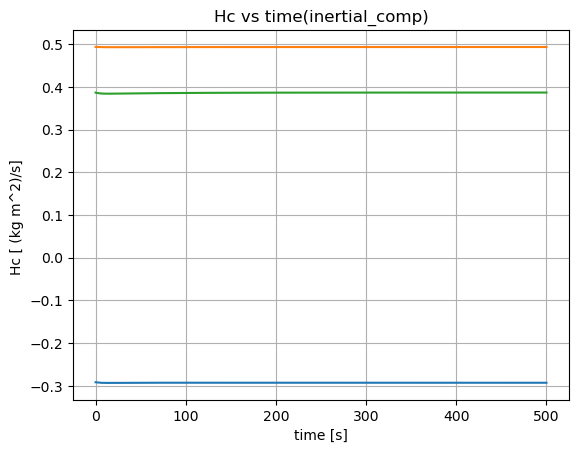

In [227]:
# inertial components of angualar momentum 

x=[]

for i in range(int(t_final/h)):
    H_inertial=np.linalg.inv(dcm_from_mrp(sigma[i])) @ H[i]
    x.append(H_inertial)
    
HX=np.array(x)[:,0].flatten()
HY=np.array(x)[:,1].flatten()
HZ=np.array(x)[:,2].flatten()

plt.figure()
plt.plot(time[:-1] ,HX)
plt.plot(time[:-1] ,HY)
plt.plot(time[:-1] ,HZ)
plt.xlabel("time [s]")
plt.ylabel("Hc [ (kg m^2)/s] ")
plt.title("Hc vs time(inertial_comp)")
plt.grid()
plt.show()

In [228]:
# Since Lc=0, Hc should be constant 
# check 1: ok 

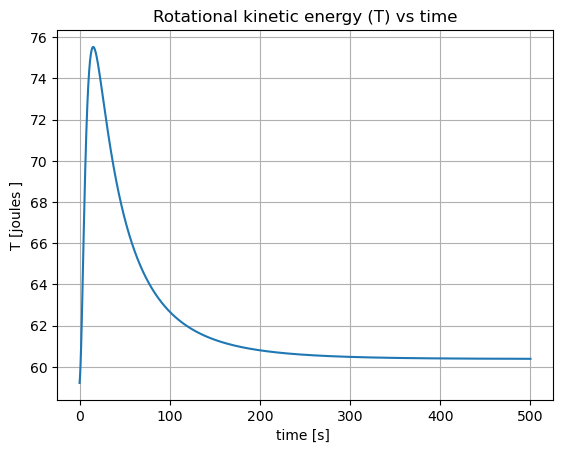

In [229]:
plt.figure()
plt.plot(time ,T)
plt.xlabel("time [s] ")
plt.ylabel("T [joules ]")
plt.title("Rotational kinetic energy (T) vs time")
plt.grid()
plt.show()

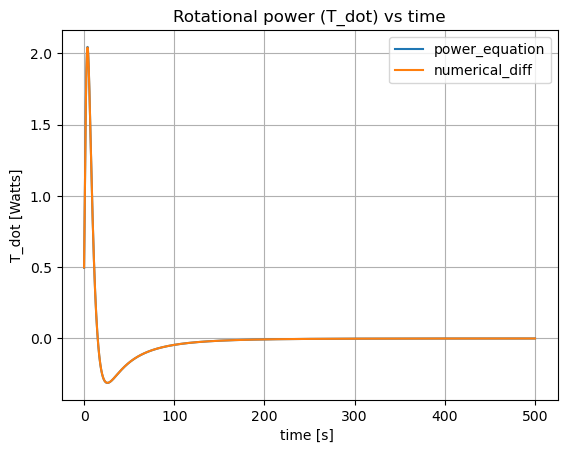

In [230]:
plt.figure()
plt.plot(time ,T_dot, label='power_equation')
plt.plot(time[:-1] ,(np.array(T[1:])-np.array(T[:-1]))/h, label='numerical_diff')
plt.legend()
plt.xlabel('time [s] ')
plt.ylabel('T_dot [Watts]')
plt.title('Rotational power (T_dot) vs time')
plt.grid(True)
plt.show()

In [231]:
# check 2: ok 

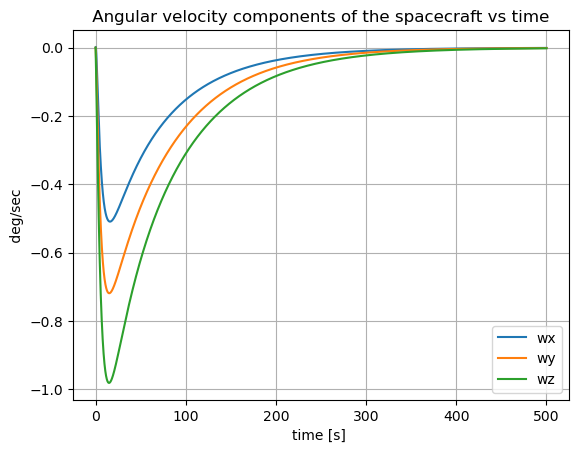

In [232]:
plt.figure()
plt.plot(time, np.degrees(np.array(w)[:,0]), label='wx')
plt.plot(time, np.degrees(np.array(w)[:,1]), label='wy')
plt.plot(time, np.degrees(np.array(w)[:,2]), label='wz')
plt.legend()
plt.xlabel("time [s] ")
plt.ylabel(" deg/sec ")
plt.title(" Angular velocity components of the spacecraft vs time ")
plt.grid()


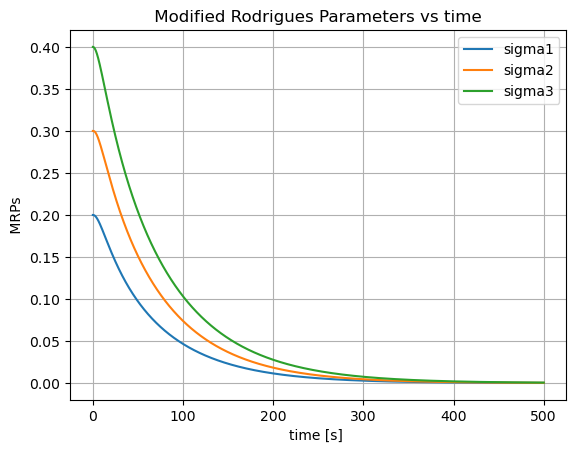

In [233]:
plt.figure()
plt.plot(time, np.array(sigma)[:,0], label='sigma1')
plt.plot(time, np.array(sigma)[:,1], label='sigma2')
plt.plot(time, np.array(sigma)[:,2], label='sigma3')
plt.xlabel("time [s] ")
plt.ylabel(" MRPs ")
plt.title(" Modified Rodrigues Parameters vs time ")
plt.grid()
plt.legend()

In [234]:
Omega[-1]

array([15.98407777, 13.07035908, 18.1956679 , 15.7817395 ])

In [235]:
gamma_dot[-1]

array([ 1.19210927e-05, -1.00027815e-05,  1.94148072e-06, -1.19543868e-06])

In [236]:
np.array(us).max()

0.13681592107172896

In [237]:
np.array(ug).max()

0.032750824020072185

In [238]:
np.array(gamma_dot).max()

0.08563618763062457

In [239]:
np.array(Omega).max()

21.99493758883425

In [240]:
np.array(us)[:,0]

array([-8.25832396e-02, -8.25560487e-02, -8.25255968e-02, ...,
        7.17700673e-06,  7.17611690e-06,  7.17522718e-06])

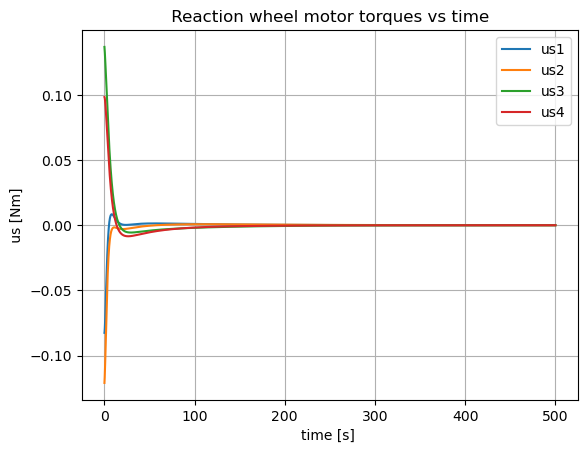

In [241]:
plt.figure()

plt.plot(time, np.array(us)[:,0], label='us1')
plt.plot(time, np.array(us)[:,1], label='us2')
plt.plot(time, np.array(us)[:,2], label='us3')
plt.plot(time, np.array(us)[:,3], label='us4')
plt.xlabel("time [s] ")
plt.ylabel(" us [Nm] ")
plt.title(" Reaction wheel motor torques vs time ")
plt.grid()
plt.legend()


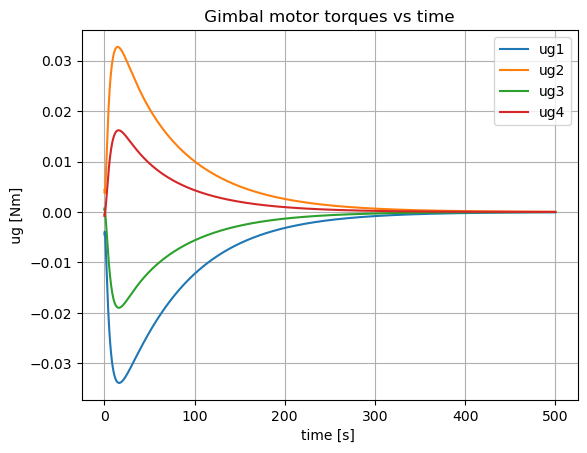

In [242]:
plt.figure()

plt.plot(time, np.array(ug)[:,0], label='ug1')
plt.plot(time, np.array(ug)[:,1], label='ug2')
plt.plot(time, np.array(ug)[:,2], label='ug3')
plt.plot(time, np.array(ug)[:,3], label='ug4')
plt.xlabel("time [s] ")
plt.ylabel(" ug [Nm] ")
plt.title(" Gimbal motor torques vs time ")
plt.grid()
plt.legend()

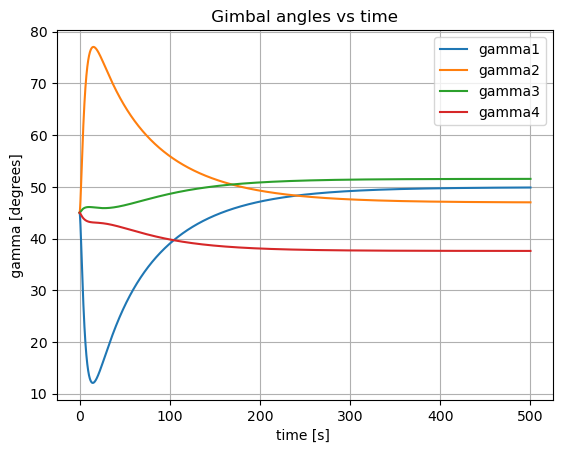

In [243]:
plt.figure()

plt.plot(time, np.degrees(np.array(gamma)[:,0]), label='gamma1')
plt.plot(time, np.degrees(np.array(gamma)[:,1]), label='gamma2')
plt.plot(time, np.degrees(np.array(gamma)[:,2]), label='gamma3')
plt.plot(time, np.degrees(np.array(gamma)[:,3]), label='gamma4')
plt.xlabel("time [s] ")
plt.ylabel(" gamma [degrees] ")
plt.title(" Gimbal angles vs time ")
plt.grid()
plt.legend()


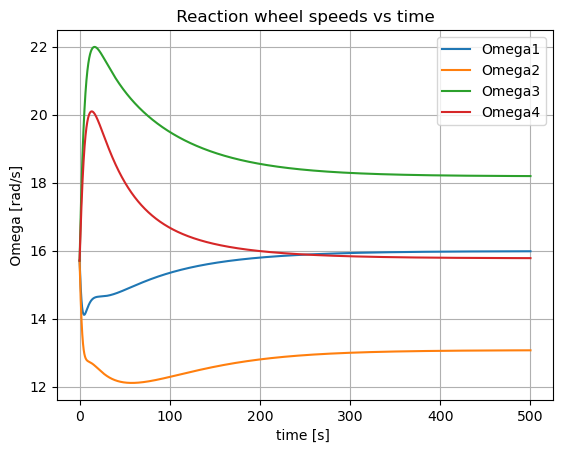

In [244]:
plt.figure()

plt.plot(time, np.array(Omega)[:,0], label='Omega1')
plt.plot(time, np.array(Omega)[:,1], label='Omega2')
plt.plot(time, np.array(Omega)[:,2], label='Omega3')
plt.plot(time, np.array(Omega)[:,3], label='Omega4')
plt.xlabel("time [s] ")
plt.ylabel(" Omega [rad/s] ")
plt.title(" Reaction wheel speeds vs time ")
plt.grid()
plt.legend()


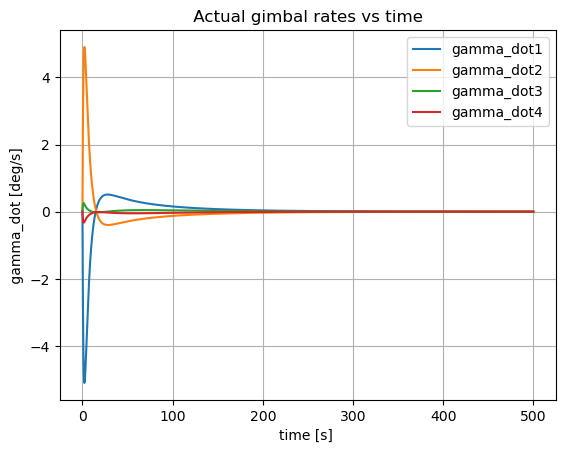

In [245]:
plt.figure()

plt.plot(time, np.degrees(np.array(gamma_dot)[:,0]), label='gamma_dot1')
plt.plot(time, np.degrees(np.array(gamma_dot)[:,1]), label='gamma_dot2')
plt.plot(time, np.degrees(np.array(gamma_dot)[:,2]), label='gamma_dot3')
plt.plot(time, np.degrees(np.array(gamma_dot)[:,3]), label='gamma_dot4')
plt.xlabel("time [s] ")
plt.ylabel(" gamma_dot [deg/s] ")
plt.title(" Actual gimbal rates vs time ")
plt.grid()
plt.legend()

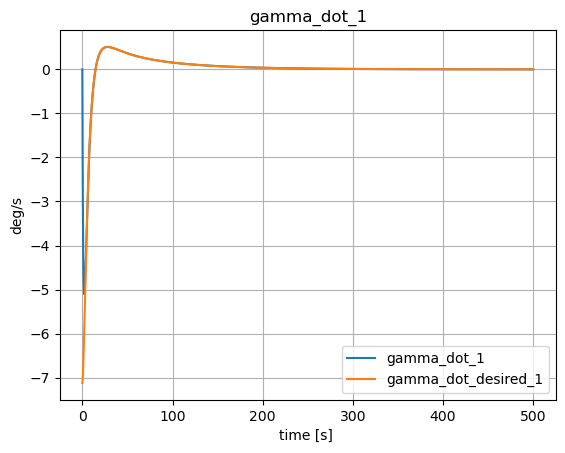

In [246]:
plt.figure()
plt.plot(time, np.degrees(np.array(gamma_dot)[:,0]), label='gamma_dot_1')
plt.plot(time, np.degrees(np.array(gamma_dot_desired)[:,0]), label='gamma_dot_desired_1')
plt.xlabel('time [s] ')
plt.ylabel('deg/s')
plt.title('gamma_dot_1')
plt.grid(True)
plt.legend()

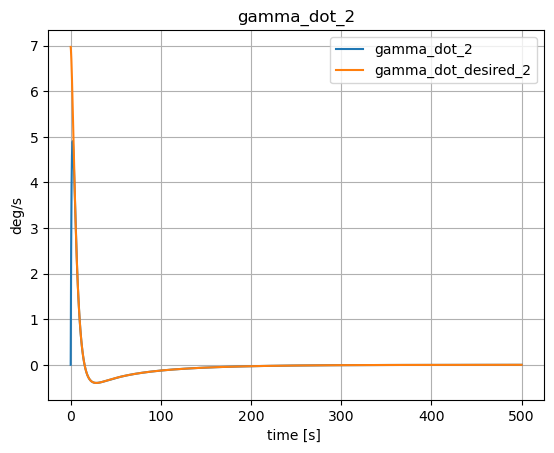

In [247]:
plt.figure()
plt.plot(time, np.degrees(np.array(gamma_dot)[:,1]), label='gamma_dot_2')
plt.plot(time, np.degrees(np.array(gamma_dot_desired)[:,1]), label='gamma_dot_desired_2')
plt.xlabel('time [s] ')
plt.ylabel('deg/s')
plt.title('gamma_dot_2')
plt.grid(True)
plt.legend()

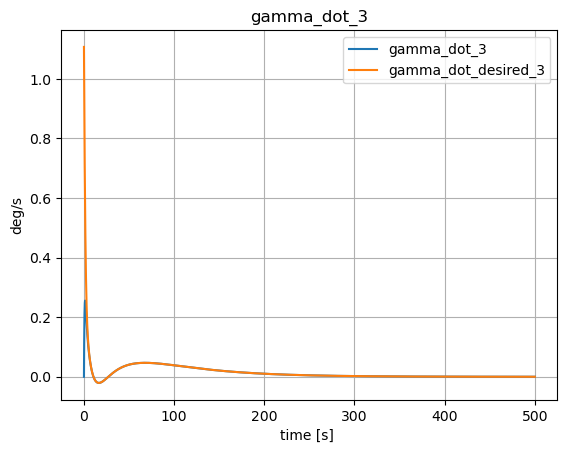

In [248]:
plt.figure()
plt.plot(time, np.degrees(np.array(gamma_dot)[:,2]), label='gamma_dot_3')
plt.plot(time, np.degrees(np.array(gamma_dot_desired)[:,2]), label='gamma_dot_desired_3')
plt.xlabel('time [s] ')
plt.ylabel('deg/s')
plt.title('gamma_dot_3')
plt.grid(True)
plt.legend()

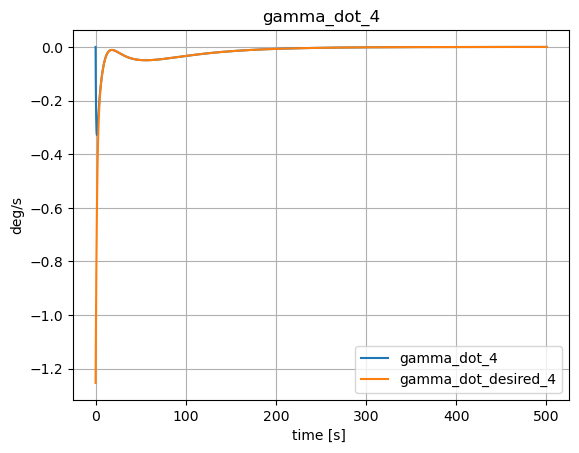

In [249]:
plt.figure()
plt.plot(time, np.degrees(np.array(gamma_dot)[:,3]), label='gamma_dot_4')
plt.plot(time, np.degrees(np.array(gamma_dot_desired)[:,3]), label='gamma_dot_desired_4')
plt.xlabel('time [s] ')
plt.ylabel('deg/s')
plt.title('gamma_dot_4')
plt.grid(True)
plt.legend()

In [250]:
# final values

In [251]:
Omega[-1]

array([15.98407777, 13.07035908, 18.1956679 , 15.7817395 ])

In [252]:
np.degrees(gamma[-1])

array([49.87032031, 47.00509086, 51.53806887, 37.61018685])

In [253]:
np.degrees(gamma_dot[-1])

array([ 6.83028298e-04, -5.73117164e-04,  1.11238652e-04, -6.84935912e-05])

In [254]:
sigma[-1]

array([0.00017495, 0.00027741, 0.00054181])

In [255]:
angles(np.array([0.00017495, 0.00027741, 0.00054181]))

(0.12419597519587397, 0.06353417694759059, 0.04016446023640504)

In [256]:
np.degrees(w[-1])

array([-0.00056383, -0.00089196, -0.00163244])

In [257]:
# for 3d-simulation

sigma=np.array(sigma)
time_propogation=np.array(time)

Cs=[]

for i in range(len(time_propogation)):

    Cs.append(dcm_from_mrp(sigma[i]))
    
Cs=np.array(Cs)

In [262]:
Cs

array([[[-2.01850850e-01,  9.71095487e-01, -1.27396190e-01],
        [-3.94207079e-01,  3.85193198e-02,  9.18214050e-01],
        [ 8.96580734e-01,  2.35562767e-01,  3.75037558e-01]],

       [[-2.01850793e-01,  9.71095489e-01, -1.27396263e-01],
        [-3.94207077e-01,  3.85194118e-02,  9.18214047e-01],
        [ 8.96580748e-01,  2.35562742e-01,  3.75037541e-01]],

       [[-2.01850621e-01,  9.71095496e-01, -1.27396483e-01],
        [-3.94207073e-01,  3.85196887e-02,  9.18214037e-01],
        [ 8.96580789e-01,  2.35562668e-01,  3.75037490e-01]],

       ...,

       [[ 9.99997034e-01,  2.16818935e-03, -1.10920892e-03],
        [-2.16741236e-03,  9.99997405e-01,  7.01215848e-04],
        [ 1.11072641e-03, -6.98809655e-04,  9.99999139e-01]],

       [[ 9.99997035e-01,  2.16790428e-03, -1.10905341e-03],
        [-2.16712750e-03,  9.99997406e-01,  7.01117104e-04],
        [ 1.11057049e-03, -6.98711566e-04,  9.99999139e-01]],

       [[ 9.99997036e-01,  2.16761924e-03, -1.10889792e-03],
 

In [265]:
body_frame_i=Cs[:, 0, :] 
body_frame_i

array([[-0.20185085,  0.97109549, -0.12739619],
       [-0.20185079,  0.97109549, -0.12739626],
       [-0.20185062,  0.9710955 , -0.12739648],
       ...,
       [ 0.99999703,  0.00216819, -0.00110921],
       [ 0.99999704,  0.0021679 , -0.00110905],
       [ 0.99999704,  0.00216762, -0.0011089 ]])

In [266]:
body_frame_j=Cs[:, 1, :] 
body_frame_j

array([[-3.94207079e-01,  3.85193198e-02,  9.18214050e-01],
       [-3.94207077e-01,  3.85194118e-02,  9.18214047e-01],
       [-3.94207073e-01,  3.85196887e-02,  9.18214037e-01],
       ...,
       [-2.16741236e-03,  9.99997405e-01,  7.01215848e-04],
       [-2.16712750e-03,  9.99997406e-01,  7.01117104e-04],
       [-2.16684268e-03,  9.99997407e-01,  7.01018375e-04]])

In [267]:
body_frame_k=Cs[:, 2, :] 
body_frame_k

array([[ 8.96580734e-01,  2.35562767e-01,  3.75037558e-01],
       [ 8.96580748e-01,  2.35562742e-01,  3.75037541e-01],
       [ 8.96580789e-01,  2.35562668e-01,  3.75037490e-01],
       ...,
       [ 1.11072641e-03, -6.98809655e-04,  9.99999139e-01],
       [ 1.11057049e-03, -6.98711566e-04,  9.99999139e-01],
       [ 1.11041459e-03, -6.98613490e-04,  9.99999139e-01]])

In [268]:
body_frame_k.shape

(50001, 3)

In [269]:
body_frame_k[::100]

array([[ 8.96580734e-01,  2.35562767e-01,  3.75037558e-01],
       [ 8.96648008e-01,  2.35027077e-01,  3.75212769e-01],
       [ 8.96677805e-01,  2.32815208e-01,  3.76518251e-01],
       ...,
       [ 1.14203361e-03, -7.18503327e-04,  9.99999090e-01],
       [ 1.12611329e-03, -7.08489084e-04,  9.99999115e-01],
       [ 1.11041459e-03, -6.98613490e-04,  9.99999139e-01]])

In [278]:
np.array(gamma)

array([[0.78539816, 0.78539816, 0.78539816, 0.78539816],
       [0.78539816, 0.78539816, 0.78539816, 0.78539816],
       [0.7853858 , 0.78541028, 0.78540009, 0.78539599],
       ...,
       [0.87040105, 0.8203938 , 0.89950895, 0.65642162],
       [0.87040117, 0.8203937 , 0.89950897, 0.6564216 ],
       [0.87040129, 0.8203936 , 0.89950899, 0.65642159]])

In [279]:
np.array(gamma)[:,0]

array([0.78539816, 0.78539816, 0.7853858 , ..., 0.87040105, 0.87040117,
       0.87040129])

In [317]:
#  Spin, transverse and gimbal axes expressed in inertial (I,J,K)

# vscmg1

C_1=[]
gm1=np.array(gamma)[:,0]

for i in range(len(time_propogation)):

    C_1.append(np.array([[np.cos(gm1[i]),np.sin(gm1[i]), 0],[-np.sin(gm1[i]),np.cos(gm1[i]),0],[0,0,1]]) @ r_1 @ Cs[i])

C_1=np.array(C_1)

# vscmg2

C_2=[]
gm2=np.array(gamma)[:,1]

for i in range(len(time_propogation)):

    C_2.append(np.array([[np.cos(gm2[i]),np.sin(gm2[i]), 0],[-np.sin(gm2[i]),np.cos(gm2[i]),0],[0,0,1]]) @ r_2 @ Cs[i])

C_2=np.array(C_2)

# vscmg3

C_3=[]
gm3=np.array(gamma)[:,2]

for i in range(len(time_propogation)):

    C_3.append(np.array([[np.cos(gm3[i]),np.sin(gm3[i]), 0],[-np.sin(gm3[i]),np.cos(gm3[i]),0],[0,0,1]]) @ r_3 @ Cs[i])

C_3=np.array(C_3)

# vscmg4

C_4=[]
gm4=np.array(gamma)[:,3]

for i in range(len(time_propogation)):

    C_4.append(np.array([[np.cos(gm4[i]),np.sin(gm4[i]), 0],[-np.sin(gm4[i]),np.cos(gm4[i]),0],[0,0,1]]) @ r_4 @ Cs[i])

C_4=np.array(C_4)


spin= np.stack([C_1[:, 0, :] , C_2[:, 0, :] , C_3[:, 0, :] , C_4[:, 0, :] ], axis=1)
transverse=np.stack([C_1[:, 1, :] , C_2[:, 1, :] , C_3[:, 1, :] , C_4[:, 1, :] ], axis=1)
gimbal=np.stack([C_1[:, 2, :] , C_2[:, 2, :] , C_3[:, 2, :] , C_4[:, 2, :] ], axis=1)    

In [355]:
# placeholder for T_dot numerical (for equal size)

T_dot_num=np.append((np.array(T[1:])-np.array(T[:-1]))/h, 0)
T_dot_num.shape

(50001,)

In [369]:
# yaw-pitch-roll arrays

yaw_vec=[]
pitch_vec=[]
roll_vec=[]

for i in range(len(time_propogation)):
    yaw_vec.append(angles(sigma[i])[0])
    pitch_vec.append(angles(sigma[i])[1])
    roll_vec.append(angles(sigma[i])[2])
    
    


In [381]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# -------------------------
# ORIGINAL DATA (unchanged)
# -------------------------
time = time_propogation[::100]
i_vectors = body_frame_i[::100]
j_vectors = body_frame_j[::100]
k_vectors = body_frame_k[::100]

spin_vectors = spin[::100]
transverse_vectors = transverse[::100]
gimbal_vectors = gimbal[::100]

spin_vectors /= np.linalg.norm(spin_vectors, axis=2)[:,:,None]
transverse_vectors /= np.linalg.norm(transverse_vectors, axis=2)[:,:,None]
gimbal_vectors /= np.linalg.norm(gimbal_vectors, axis=2)[:,:,None]

cube_vertices = np.array([
    [-0.5, -0.5, -0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5,  0.5, -0.5],
    [-0.5,  0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5,  0.5],
    [-0.5,  0.5,  0.5]
])
faces_idx = [
    [0,1,2,3],
    [4,5,6,7],
    [0,1,5,4],
    [2,3,7,6],
    [1,2,6,5],
    [4,7,3,0]
]

V1 = np.array([ 0.0,   -0.25, -0.5])
V2 = np.array([-0.25,   0.0,  -0.5])
V3 = np.array([-0.5,   -0.25, -0.5])
V4 = np.array([-0.25,  -0.5,  -0.5])
apex = np.array([-0.25, -0.25, -0.14625818])
pyramid_vertices = [V1, V2, V3, V4]

# -------------------------
# ACTUAL 2D SIGNALS
# -------------------------
left_signals = [
    [np.array(sigma)[:,0][::100], np.array(sigma)[:,1][::100], np.array(sigma)[:,2][::100]],                         
    [np.degrees(np.array(w)[:,0])[::100], np.degrees(np.array(w)[:,1])[::100], np.degrees(np.array(w)[:,2])[::100]], 
    [HX[::100], HY[::100], HZ[::100]],                                                                               
    [T[::100]],                                                                                                      
    [T_dot_num[::100], T_dot[::100]]                                                                                 
]

right_signals = [
    [np.array(Omega)[:,0][::100], np.array(Omega)[:,1][::100], np.array(Omega)[:,2][::100], np.array(Omega)[:,3][::100]],      
    [np.degrees(np.array(gamma_dot)[:,0])[::100], np.degrees(np.array(gamma_dot)[:,1])[::100], 
     np.degrees(np.array(gamma_dot)[:,2])[::100], np.degrees(np.array(gamma_dot)[:,3])[::100]],  
    [np.degrees(np.array(gamma)[:,0])[::100], np.degrees(np.array(gamma)[:,1])[::100], 
     np.degrees(np.array(gamma)[:,2])[::100], np.degrees(np.array(gamma)[:,3])[::100]],      
    [np.array(us)[:,0][::100], np.array(us)[:,1][::100], np.array(us)[:,2][::100], np.array(us)[:,3][::100]],                      
    [np.array(ug)[:,0][::100], np.array(ug)[:,1][::100], np.array(ug)[:,2][::100], np.array(ug)[:,3][::100]]                       
]

# -------------------------
# Custom legend labels
# -------------------------
legend_labels_left = [
    ["σ1", "σ2", "σ3"],                           
    ["ωx", "ωy", "ωz"],                           
    ["HX", "HY", "HZ"],                           
    ["KE"],                                       
    ["Power (num)", "Power (theory)"]             
]

legend_labels_right = [
    ["Ω1", "Ω2", "Ω3", "Ω4"],                     
    ["γ1_d", "γ2_d", "γ3_d", "γ4_d"],             
    ["γ1", "γ2", "γ3", "γ4"],                     
    ["us1", "us2", "us3", "us4"],                 
    ["ug1", "ug2", "ug3", "ug4"]                  
]

# -------------------------
# Custom legend sizes/positions per subplot
# -------------------------
legend_fonts_left = [9, 9, 9, 9, 9]   
legend_locs_left  = ['upper right', 'lower right', (0.72,0.15), 'upper right', 'upper right' ]

legend_fonts_right = [7, 7, 7, 7, 7] 
legend_locs_right  = [(1.02,0.5), 'upper right', (1.02,0.5), 'upper right', 'upper right']

# -------------------------
# Compute y-limits for all 2D plots
# -------------------------
def compute_ylim(signal_list):
    ymin = min([np.min(sig) for sig in signal_list])
    ymax = max([np.max(sig) for sig in signal_list])
    margin = 0.05*(ymax-ymin) if ymax!=ymin else 0.1
    return (ymin-margin, ymax+margin)

left_ylim = [compute_ylim(sig_list) for sig_list in left_signals]
right_ylim = [compute_ylim(sig_list) for sig_list in right_signals]

# -------------------------
# Yaw, Pitch, Roll arrays (downsampled)
# -------------------------
yaw   = yaw_vec[::100] 
pitch = pitch_vec[::100] 
roll  = roll_vec[::100] 

# -------------------------
# Layout: axes placement
# -------------------------
fig = plt.figure(figsize=(16,9))
center_x0, center_y0, center_w, center_h = 0.22, 0.05, 0.56, 0.9
ax3d = fig.add_axes([center_x0, center_y0, center_w, center_h], projection='3d')

left_x0, left_w = 0.05, 0.16
right_x0, right_w = center_x0 + center_w + 0.02, 0.16

n_plots = 5
pad = 0.03
top, bottom = 0.97, 0.03
available_h = top - bottom - (n_plots-1)*pad
ax_h = available_h / n_plots

ax_left, ax_right = [], []
for i in range(n_plots):
    bottom_i = top - (i+1)*ax_h - i*pad
    ax_left.append(fig.add_axes([left_x0, bottom_i, left_w, ax_h]))
    ax_right.append(fig.add_axes([right_x0, bottom_i, right_w, ax_h]))

# -------------------------
# Create line objects per subplot
# -------------------------
left_lines = [ [ax.plot([],[],lw=1.5)[0] for _ in sig_list] for sig_list, ax in zip(left_signals, ax_left) ]
right_lines = [ [ax.plot([],[],lw=1.5)[0] for _ in sig_list] for sig_list, ax in zip(right_signals, ax_right) ]

# -------------------------
# Configure axes titles, labels, and legends
# -------------------------
y_labels_left  = ['MRPs','deg/s', 'kg m^2/s', 'Joules', 'Watts']
y_labels_right = ['rad/s', 'deg/s', 'degrees', 'Nm', 'Nm']
titles_left  = ['MRPs','Angular velocity (body comp.)','Angular momentum (inertial comp.)','Kinetic energy','Power']
titles_right = ['Reaction wheel speeds','Gimbal rates','Gimbal angles','Reaction wheel motor torques','Gimbal motor torques']

for i, ax in enumerate(ax_left):
    ax.set_xlim(time[0], time[-1])
    ax.set_ylim(left_ylim[i])
    ax.grid(True)
    ax.set_ylabel(y_labels_left[i], fontsize=10)
    ax.set_title(titles_left[i], fontsize=10, pad=5)
    if i < n_plots-1: plt.setp(ax.get_xticklabels(), visible=False)
    else: ax.set_xlabel('Time', fontsize=10)
    ax.legend(legend_labels_left[i], fontsize=legend_fonts_left[i], frameon=True, loc=legend_locs_left[i])

for i, ax in enumerate(ax_right):
    ax.set_xlim(time[0], time[-1])
    ax.set_ylim(right_ylim[i])
    ax.grid(True)
    ax.set_ylabel(y_labels_right[i], fontsize=10)
    ax.set_title(titles_right[i], fontsize=10, pad=5)
    if i < n_plots-1: plt.setp(ax.get_xticklabels(), visible=False)
    else: ax.set_xlabel('Time', fontsize=10)
    ax.legend(legend_labels_right[i], fontsize=legend_fonts_right[i], frameon=True, loc=legend_locs_right[i])

# -------------------------
# Animation update function
# -------------------------
def update_frame(frame):
    ax3d.cla()
    ax3d.set_xlim([-0.7,0.7])
    ax3d.set_ylim([-0.7,0.7])
    ax3d.set_zlim([-0.7,0.7])
    ax3d.set_xlabel("I")
    ax3d.set_ylabel("J")
    ax3d.set_zlabel("K")
    
    ax3d.set_title("Rest to Rest Spacecraft Maneuver Using VSCMGs", fontsize=18, pad=14)
    
    # Time label
    ax3d.text2D(0.5, 0.95, f"Time = {time[frame]:.2f} s", transform=ax3d.transAxes,
                fontsize=12, ha='center')

    # YPR box
    ax3d.text2D(0.65, 0.95,
                f"Yaw={yaw[frame]:.1f}°\nPitch={pitch[frame]:.1f}°\nRoll={roll[frame]:.1f}°",
                transform=ax3d.transAxes,
                fontsize=10, ha='left', va='top',
                bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.6))

    # Grey target axes
    ax3d.quiver(0,0,0,1,0,0,color='0.5',length=1,arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0,0,1,0,color='0.5',length=1,arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0,0,0,1,color='0.5',length=1,arrow_length_ratio=0.1)

    # Rotated spacecraft cube
    R = np.vstack([i_vectors[frame], j_vectors[frame], k_vectors[frame]]).T
    rotated_vertices = cube_vertices @ R.T
    rotated_faces = [[rotated_vertices[j] for j in f] for f in faces_idx]
    poly = Poly3DCollection(rotated_faces, facecolors='cyan', edgecolors='k', alpha=0.3)
    ax3d.add_collection3d(poly)

    # Body frame axes
    ax3d.quiver(0,0,0,i_vectors[frame,0],i_vectors[frame,1],i_vectors[frame,2],color='r',length=1,arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0,j_vectors[frame,0],j_vectors[frame,1],j_vectors[frame,2],color='g',length=1,arrow_length_ratio=0.1)
    ax3d.quiver(0,0,0,k_vectors[frame,0],k_vectors[frame,1],k_vectors[frame,2],color='b',length=1,arrow_length_ratio=0.1)

    # VSCMG pyramid edges (blue)
    rot_apex = apex @ R.T
    rot_bases = [v @ R.T for v in pyramid_vertices]
    labels_vscmg = ["V1", "V2", "V3", "V4"]
    for idx, vb in enumerate(rot_bases):
        ax3d.plot([rot_apex[0], vb[0]], [rot_apex[1], vb[1]], [rot_apex[2], vb[2]], color='b', linewidth=2)
        ax3d.text(vb[0], vb[1], vb[2], labels_vscmg[idx], color='k', fontsize=10, weight='bold')

        # Midpoint vectors
        midpoint = 0.5*(rot_apex+vb)
        s_vec, t_vec, g_vec = spin_vectors[frame,idx], transverse_vectors[frame,idx], gimbal_vectors[frame,idx]
        ax3d.quiver(midpoint[0],midpoint[1],midpoint[2], s_vec[0],s_vec[1],s_vec[2], color='r',length=0.2,arrow_length_ratio=0.2)
        ax3d.quiver(midpoint[0],midpoint[1],midpoint[2], t_vec[0],t_vec[1],t_vec[2], color='g',length=0.2,arrow_length_ratio=0.2)
        ax3d.quiver(midpoint[0],midpoint[1],midpoint[2], g_vec[0],g_vec[1],g_vec[2], color='b',length=0.2,arrow_length_ratio=0.2)

    # Update 2D plots
    for i, lines in enumerate(left_lines):
        for j, line in enumerate(lines):
            line.set_data(time[:frame], left_signals[i][j][:frame])
    for i, lines in enumerate(right_lines):
        for j, line in enumerate(lines):
            line.set_data(time[:frame], right_signals[i][j][:frame])

    # Persistent 3D legend
    proxy_lines = [
        Line2D([0],[0], color='r', lw=2),
        Line2D([0],[0], color='g', lw=2),
        Line2D([0],[0], color='b', lw=2),
        Patch(facecolor='cyan', edgecolor='k', alpha=0.3),
        Line2D([0],[0], color='0.5', lw=2),
        Line2D([0],[0], color='r', lw=2),
        Line2D([0],[0], color='g', lw=2),
        Line2D([0],[0], color='b', lw=2)
    ]
    labels = [
        "Body x-axis", "Body y-axis", "Body z-axis", "Cube = Spacecraft",
        "Target axes", "VSCMG spin axes", "VSCMG transverse axes", "VSCMG gimbal axes",
        "V1: VSCMG1", "V2: VSCMG2", "V3: VSCMG3", "V4: VSCMG4"
    ]

    # Add numbering for VSCMGs in legend as text-only proxies
    proxy_text = [Line2D([0],[0], color='none')] * 4
    proxy_lines.extend(proxy_text)

    ax3d.legend(proxy_lines, labels, loc='lower left', fontsize=9, frameon=True, ncol=2)

    return []

# -------------------------
# Animation
# -------------------------
total_frames = len(time)
fps = total_frames / 20.0
interval_ms = 1000.0 / fps

ani = FuncAnimation(fig, update_frame, frames=np.arange(total_frames),
                    interval=interval_ms, blit=False, repeat=False)

writer = FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=6000)
ani.save("spacecraft_cube_with_legends_ypr.mp4", writer=writer, dpi=100)
print("Saved: spacecraft_cube_with_legends_ypr.mp4")

plt.show()


<IPython.core.display.Javascript object>

Saved: spacecraft_cube_with_legends_ypr.mp4
